# ML assignment 3 Unsupervised Learning

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [1]:
%run ./ML_a3_Functions.ipynb

In [2]:
def gen_op(name, time, y_train, labels):
#     df_time.loc[i] = [name, 
#                       np.round(time,3),
#                       np.round(f1_score(y_train,labels),3),
#                       np.round(roc_auc_score(y_train,labels),3)
#                      ]
    dfg = pd.DataFrame({'name':[name],
                         'time':[ np.round(time,3)],
                         'f1_score':[np.round(f1_score(y_train,labels, average='weighted'),3)],                
#                          'roc_score':[np.round(roc_auc_score(y_train,labels),3)]
                        })
    return dfg
    
def transform_list(lst):
#     ones_count = sum(lst)
#     zeros_count = len(lst) - ones_count
#     if ones_count > zeros_count:
#         return [0 if x == 1 else 1 for x in lst]
#     else:
#         return [1 if x == 1 else 0 for x in lst]
    dft = pd.DataFrame({'target': lst})
    cc=dft.target.value_counts(ascending=False)
    ccmap = {cc.index[i]: i for i in range(len(cc))}
    dft = dft.target.map(ccmap)
    return dft    
    
def run_nn(name, X_t, new_label, y_train, X_test, test_label, y_test):
    mlp =  MLPClassifier(random_state = 0, 
                     hidden_layer_sizes=(3,), 
                     activation='identity')
    X_t = pd.DataFrame(X_t)
    X_t['cluster'] = new_label
    X_t.columns = X_t.columns.astype(str)
    X_test['cluster'] = test_label
    X_test.columns = X_test.columns.astype(str)
    mlp.fit(X_t, y_train)
    nn_perf = model2(mlp, X_t, y_train, X_test, y_test)
    nn_perf['name'] = name
    print(nn_perf)
    return nn_perf

In [3]:
#load data
nrows = 10000
df = pd.read_csv('customer_segment.csv', nrows = nrows) 
df.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
# df.Segmentation=LabelEncoder().fit_transform(df.Segmentation)
df.Segmentation=transform_list(df.Segmentation)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,3
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,3
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,0
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,3


In [4]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
X_train, X_valid, X_test = std_scale(X_train, X_valid, X_test)
# oversampling
# X_train, y_train = oversampling(X_train, y_train)

In [5]:
X_train

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.133008,-0.583689,-1.002499,1.102238,-1.102238,1.211599,-1.168372,1.296412,-1.267902,-0.670119,...,-0.575934,-0.423763,0.818739,-0.118923,-0.237192,2.953500,-0.399955,-0.100867,-1.354142,-0.163234
1,1.192590,-0.245058,0.086324,-0.907245,0.907245,-0.825355,0.855892,-0.771359,0.788704,-0.670119,...,-0.575934,2.359810,-1.221391,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
2,0.350563,2.463984,0.086324,1.102238,-1.102238,-0.825355,0.855892,-0.771359,0.788704,-0.670119,...,1.736311,-0.423763,-1.221391,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
3,0.911914,-0.583689,0.086324,-0.907245,0.907245,-0.825355,0.855892,-0.771359,0.788704,1.492272,...,-0.575934,-0.423763,0.818739,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
4,-0.210788,-0.245058,1.719559,-0.907245,0.907245,-0.825355,0.855892,1.296412,-1.267902,-0.670119,...,-0.575934,2.359810,-1.221391,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0.430756,0.770833,0.630736,-0.907245,0.907245,1.211599,-1.168372,-0.771359,0.788704,-0.670119,...,-0.575934,-0.423763,0.818739,-0.118923,4.215987,-0.338581,-0.399955,-0.100867,-1.354142,-0.163234
5159,0.150080,0.545079,1.719559,-0.907245,0.907245,-0.825355,0.855892,-0.771359,0.788704,1.492272,...,1.736311,-0.423763,-1.221391,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
5160,-1.133008,-0.583689,-1.002499,1.102238,-1.102238,1.211599,-1.168372,-0.771359,0.788704,1.492272,...,-0.575934,-0.423763,0.818739,-0.118923,-0.237192,-0.338581,-0.399955,-0.100867,0.738475,-0.163234
5161,-0.331078,-0.245058,0.630736,-0.907245,0.907245,-0.825355,0.855892,-0.771359,0.788704,-0.670119,...,1.736311,-0.423763,-1.221391,-0.118923,-0.237192,-0.338581,-0.399955,9.914054,-1.354142,-0.163234


In [6]:
df_time = pd.DataFrame()
nn_final=pd.DataFrame()

# Clustering

## Kmeans

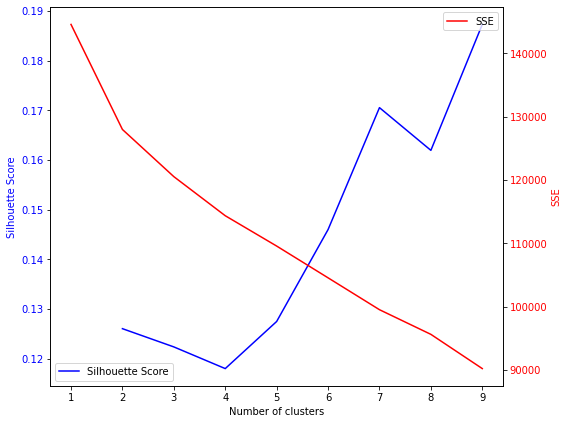

label    0.0  1.0  2.0  3.0
cluster                    
0.0      348  291  260  260
1.0      220  188  174  168
2.0      125  132  129  125
3.0       84   66   70   66
4.0       63   67   67   60
5.0       80   58   54   63
6.0       32   31   34   18


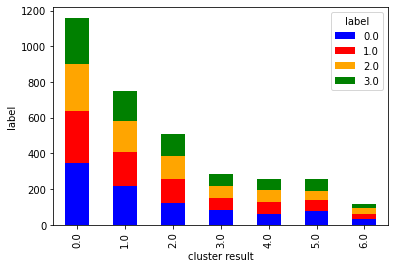

In [7]:
name = 'kmeans'
# pick k
plot_kmeans(X_train)

# model
k = 7
t_start = process_time()
kmeans_labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_train)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
plot_cluster_label(kmeans_labels, y_train)

In [8]:
df_time

,name,time,f1_score
0,kmeans,0.406,0.161


## Expectation Maximization

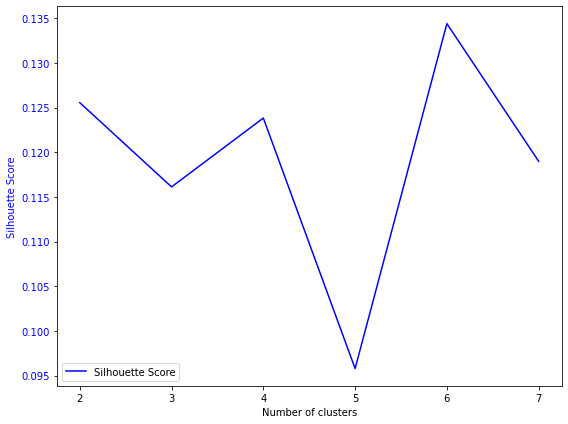

label    0.0  1.0  2.0  3.0
cluster                    
0.0      366  331  317  303
1.0      337  269  248  244
2.0      177  154  144  142
3.0       61   64   67   60
4.0       11   15   12   11


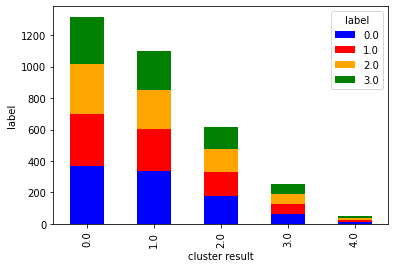

In [9]:
name = 'em'
# pick n
plot_em(X_train)

# model
t_start = process_time()
n = 5
em_labels = GaussianMixture(n_components=n).fit_predict(X_train)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
plot_cluster_label(em_labels, y_train)

In [10]:
df_time

,name,time,f1_score
0,kmeans,0.406,0.161
0,em,0.750,0.282


# Dimensional Reduction

## PCA

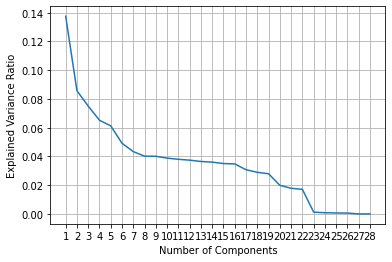

Total number of feature is:  28
Number of components needed to explain at least 75% of the variance: 14
Total variance explained by 14 components: 0.78


In [11]:
# Fit PCA on the training data
pca = PCA()
pca.fit(X_train)

# print(pca.explained_variance_ratio_)
# Plot the explained variance ratio for each component
import matplotlib.pyplot as plt
# pca.explained_variance_ratio_ = pca.explained_variance_ratio_[0:10]
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
plt.show()

# Choose the number of components that explain at least 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.75) + 1
print('Total number of feature is: ', len(pca.explained_variance_ratio_))
print(f"Number of components needed to explain at least 75% of the variance: {n_components}")

# Get the total variance explained by the selected number of components
total_variance_explained = np.sum(pca.explained_variance_ratio_[:n_components])
print(f"Total variance explained by {n_components} components: {total_variance_explained:.2f}")

In [12]:
t_start = process_time()
pca_n = n_components
X_train_pca = pd.DataFrame(pca.transform(X_train)[:, :pca_n])
X_test2 = pd.DataFrame(pca.transform(X_test)[:, :pca_n])
X_t = X_train_pca.copy()
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

Total time:  0.0


### Kmeans pca

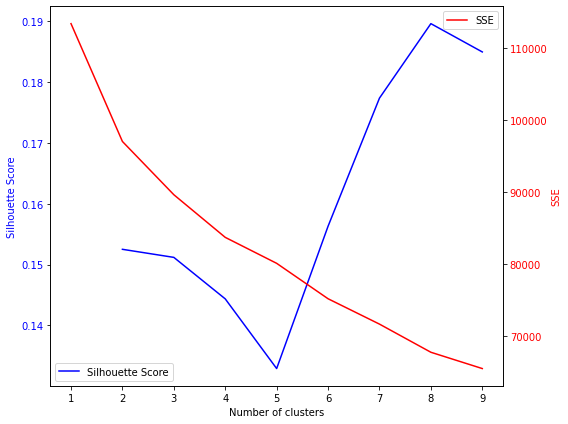

label    0.0  1.0  2.0  3.0
cluster                    
0.0      231  200  176  172
1.0      157  132  142  133
2.0      138  144  128  122
3.0       90   81   73   80
4.0       95   78   66   61
5.0       84   68   75   62
6.0       93   62   61   71
7.0       64   68   67   59


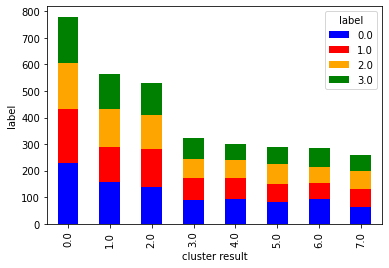

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.458     0.487      0.751     0.732         0.458     0.445     0.516   

         name  
0  kmeans_pca  


In [13]:
name = 'kmeans_pca'

# pick k
plot_kmeans(X_t)

# model
k = 8
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### EM pca

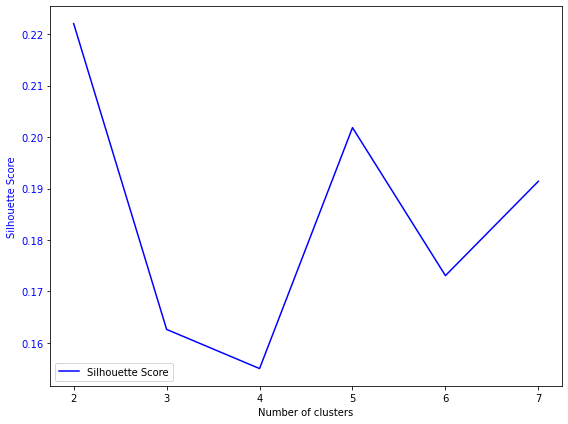

label    0.0  1.0  2.0  3.0
cluster                    
0.0      270  246  223  210
1.0      252  212  183  186
2.0      146  154  147  142
3.0      150  107  120  107
4.0      134  114  115  115


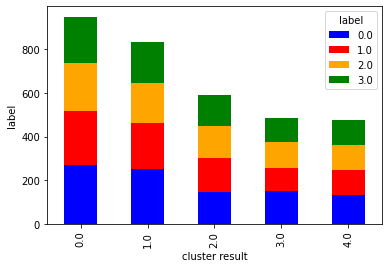

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.436      0.49      0.752     0.703         0.436     0.383     0.875   

     name  
0  em_pca  


In [14]:
name = 'em_pca'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 5
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

## ICA

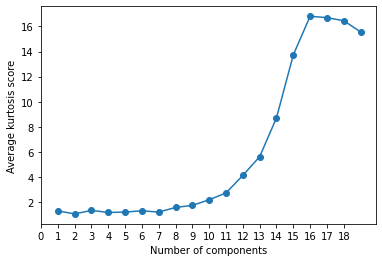

In [15]:
from scipy.stats import kurtosis
# Define the range of n_components to loop through
n_components_range = range(1, 20)
kur = []

# Loop through different values of n_components
for n_components in n_components_range:
    
    # Create an instance of the FastICA model with the current value of n_components
    ica = FastICA(n_components=n_components)

    # Fit the ICA model to the data and transform it
    ica_components = ica.fit_transform(X_train)

    # Compute the explained variance for the current value of n_components
    kur.append(mean(abs(kurtosis(ica_components))))

# Plot the explained variance as a function of the number of components
plt.plot(n_components_range, kur, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Average kurtosis score')
# plt.xticks(np.arange(len(kur)+1), np.arange(0, len(kur)+1))
plt.xticks(np.arange(len(kur)), np.arange(0, len(kur)))
plt.show()

In [16]:
# Create an instance of the FastICA model with 10 components
t_start = process_time()
ica_n = 16
ica = FastICA(n_components=ica_n)

# Fit the ICA model to the data
ica.fit(X_train)

# Transform the data using the ICA model
ica_components = ica.transform(X_train)
ica_components_test = ica.transform(X_test)
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)
# Create a new DataFrame with the ICA components
X_train_ica = pd.DataFrame(ica_components, columns=['ICA{}'.format(i+1) for i in range(ica_n)])
X_test2 = pd.DataFrame(ica_components_test, columns=['ICA{}'.format(i+1) for i in range(ica_n)])
X_t = X_train_ica.copy()

Total time:  0.0


### Kmeans ica

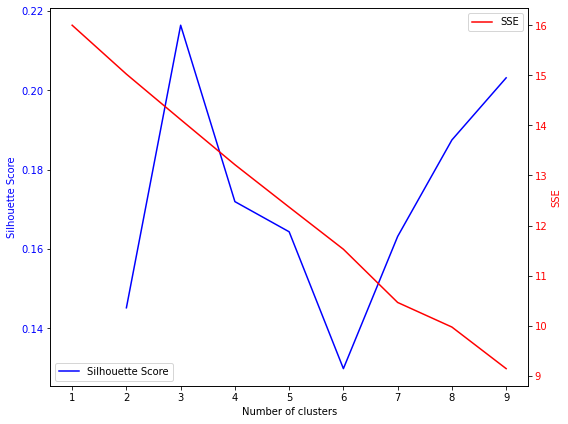

label    0.0  1.0  2.0  3.0
cluster                    
0.0      887  766  735  692
1.0       47   40   33   51
2.0       18   27   20   17


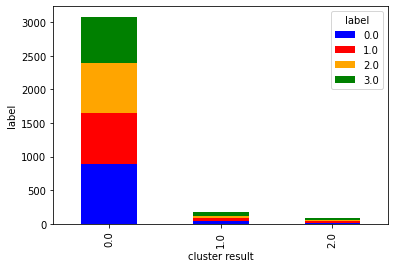

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.459     0.467      0.746     0.737         0.459     0.419     0.656   

         name  
0  kmeans_ica  


In [17]:
name = 'kmeans_ica'

# pick k
plot_kmeans(X_t)

# model
k = 3
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### EM ica

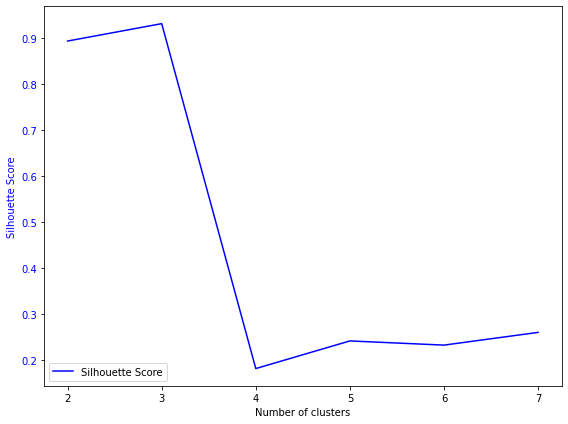

label    0.0  1.0  2.0  3.0
cluster                    
0.0      413  337  318  317
1.0      341  308  303  272
2.0      133  121  114  103
3.0       47   40   33   51
4.0       18   27   20   17


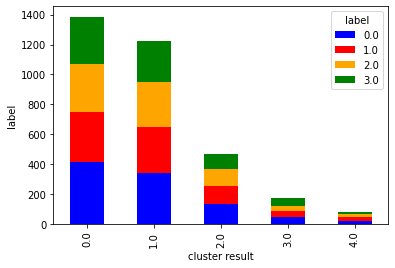

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.428     0.464      0.743     0.703         0.428     0.383     0.969   

     name  
0  em_ica  


In [18]:
name = 'em_ica'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 5
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

## Randomized Projection

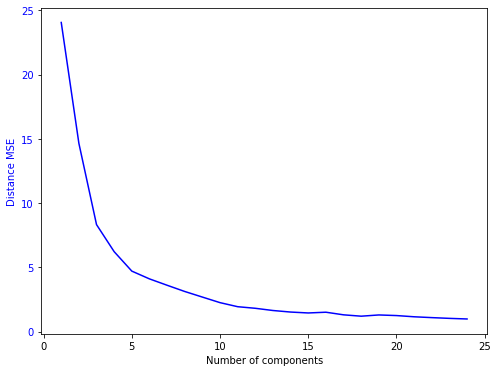

Total time:  0.0


In [19]:
n_components_range = range(1, 25)
dis=[]

from sklearn.metrics.pairwise import euclidean_distances
# Loop through different values of n_components
for n_components in n_components_range:
    # Perform randomized projection feature selection
#     rp = SparseRandomProjection(n_components=n_components, random_state=0)
    rp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_rp = rp.fit_transform(X_train)
    
    dist_original = euclidean_distances(X_train)
    dist_projected = euclidean_distances(X_rp)
    dis.append(((dist_original - dist_projected) ** 2).mean())

# Plot the scores for each k value
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'blue'
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Distance MSE', color=color)
ax1.plot(n_components_range, dis, label='Distance MSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.show()

# build model
t_start = process_time()
rp = SparseRandomProjection(n_components=13, random_state=0)
X_t = rp.fit_transform(X_train)
X_test2 = pd.DataFrame(rp.transform(X_test))
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

### Kmeans rp

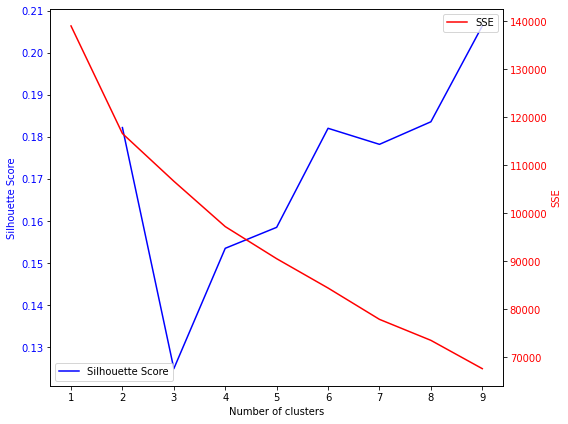

label    0.0  1.0  2.0  3.0
cluster                    
0.0      599  507  480  459
1.0      353  326  308  301


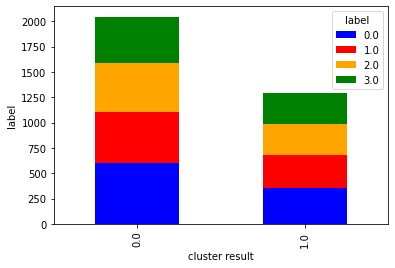

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.446     0.452      0.728     0.712         0.446      0.41     0.609   

        name  
0  kmeans_rp  


In [20]:
name = 'kmeans_rp'

# pick k
plot_kmeans(X_t)

# model
k = 2
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

In [21]:
# nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, y_test))

In [22]:
# name = 'kmeans_rp7'

# # pick k
# plot_kmeans(X_t)

# # model
# k = 7
# t_start = process_time()
# kmeans_labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_t)
# kmeans_labels = transform_list(kmeans_labels)
# t_stop = process_time()
# t = t_stop - t_start
# df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# # print(t)
# plot_cluster_label(kmeans_labels, y_train)

In [23]:
# nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test, y_test))

### EM rp

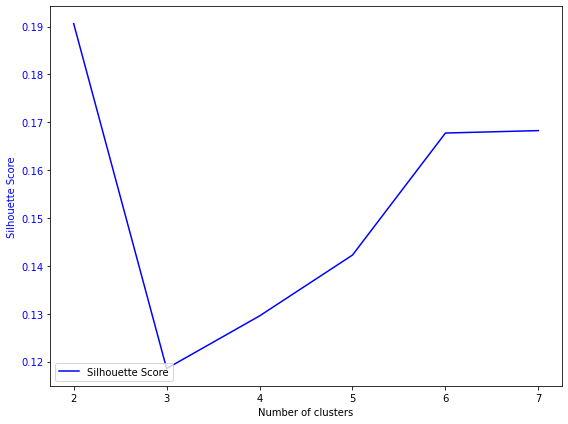

label    0.0  1.0  2.0  3.0
cluster                    
0.0      647  554  514  496
1.0      305  279  274  264


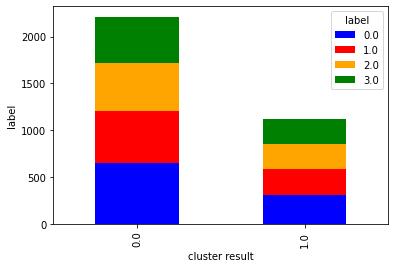

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.431     0.454      0.729     0.698         0.431     0.404     0.469   

    name  
0  em_rp  


In [24]:
name = 'em_rp'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

In [25]:
df_time

,name,time,f1_score
0,kmeans,0.406,0.161
0,em,0.750,0.282
0,kmeans_pca,0.203,0.127
0,em_pca,0.672,0.142
0,kmeans_ica,0.125,0.150
0,em_ica,0.812,0.154
0,kmeans_rp,0.156,0.143
0,em_rp,0.312,0.184


## Factor Analysis

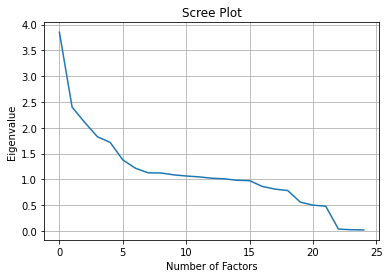

There 14 factors with a eigenvalue that greater than 1.


In [26]:
fa = FactorAnalyzer()
# X_train_t = X_train.drop(columns=['device_fraud_count'])
fa.fit(X_train.values)

# Generate the scree plot
ev, v = fa.get_eigenvalues()
# plt.plot(range(1, X_train_t.shape[1]+1), ev)
plt.plot(range(0, 25), ev[0:25])
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
print('There {} factors with a eigenvalue that greater than 1.'.format(sum(ev>1)))

In [27]:
# X_train_t = X_train.drop(columns=['device_fraud_count'])
# X_test_t = X_test.drop(columns=['device_fraud_count'])
t_start = process_time()
fa = FactorAnalyzer(n_factors=14)
fa.fit(X_train.values)
X_t = fa.transform(X_train)
X_test2 = pd.DataFrame(fa.transform(X_test))
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

Total time:  0.171875


### kmeans factor analysis

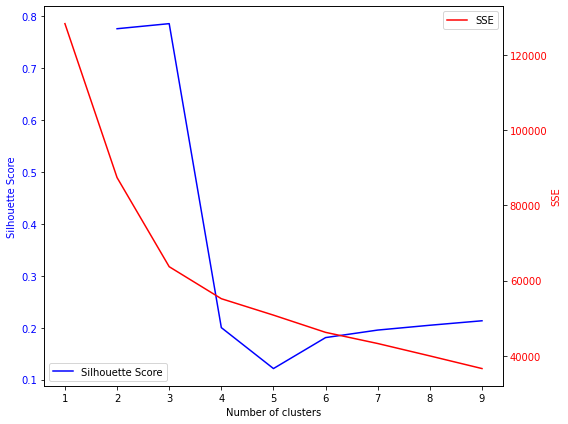

label    0.0  1.0  2.0  3.0
cluster                    
0.0      930  817  766  743
1.0       17    8   12    9
2.0        5    8   10    8


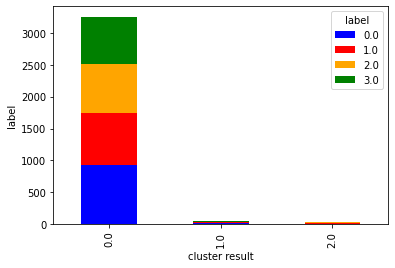

    acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.47     0.491      0.757     0.742          0.47     0.452     0.469   

        name  
0  kmeans_fa  


In [28]:
name = 'kmeans_fa'

# pick k
plot_kmeans(X_t)

# model
k = 3
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### em factor analysis

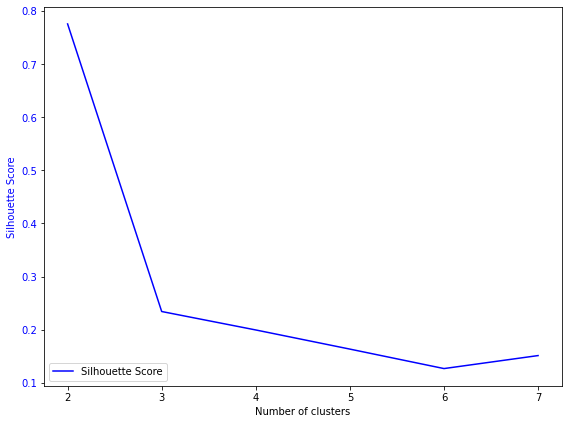

In [29]:
name = 'em_fa'
# pick n
plot_em(X_t)

label    0.0  1.0  2.0  3.0
cluster                    
0.0      476  433  423  414
1.0      459  391  353  337
2.0       17    9   12    9


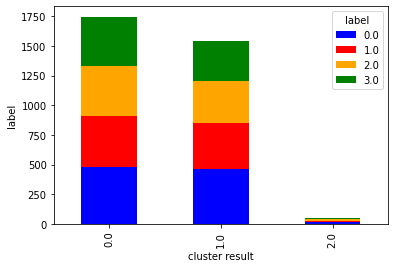

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.458     0.492      0.756     0.738         0.458     0.421       0.5   

    name  
0  em_fa  


In [30]:
# model
t_start = process_time()

n = 3
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

In [31]:
'back propagation'
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
# X_train, y_train = oversampling(X_train, y_train)
# model
mlp =  MLPClassifier(random_state = 0, 
                     hidden_layer_sizes=(3,), 
                     activation='identity')
mlp.fit(X_train, y_train)
nn_test_perf = model2(mlp, X_train, y_train, X_test, y_test)
nn_test_perf['name'] = 'nn_backpropagation'
nn_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.49,0.492,0.762,0.749,0.49,0.477,0.484,nn_backpropagation


In [32]:
nn_final=nn_final.append(nn_test_perf)

In [43]:
df_time.sort_values('name', ascending=True)

,name,time,f1_score
0,em,0.750,0.282
0,em_fa,0.531,0.232
0,em_ica,0.812,0.154
0,em_pca,0.672,0.142
0,em_rp,0.312,0.184
0,kmeans,0.406,0.161
0,kmeans_fa,0.203,0.134
0,kmeans_ica,0.125,0.150
0,kmeans_pca,0.203,0.127
0,kmeans_rp,0.156,0.143


In [34]:
nn_final.sort_values('f1_score', ascending=False)

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.490,0.492,0.762,0.749,0.490,0.477,0.484,nn_backpropagation
0,0.470,0.491,0.757,0.742,0.470,0.452,0.469,kmeans_fa
0,0.458,0.487,0.751,0.732,0.458,0.445,0.516,kmeans_pca
0,0.458,0.492,0.756,0.738,0.458,0.421,0.500,em_fa
0,0.459,0.467,0.746,0.737,0.459,0.419,0.656,kmeans_ica
0,0.446,0.452,0.728,0.712,0.446,0.410,0.609,kmeans_rp
0,0.431,0.454,0.729,0.698,0.431,0.404,0.469,em_rp
0,0.436,0.490,0.752,0.703,0.436,0.383,0.875,em_pca
0,0.428,0.464,0.743,0.703,0.428,0.383,0.969,em_ica
